In [5]:
import time
ini_tempo=time.time()

import datetime

import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier as RFC_
from sklearn.ensemble import RandomForestRegressor as RFR_
from sklearn import metrics

comex_ncm=c=pd.read_csv('~/git/BD/temp/imp_fert_quanti.csv')

# Filtra top
top_nick=c.groupby('nick').KG_LIQUIDO.sum().sort_values().index[-2:]
top_uf=c.groupby('SG_UF_NCM').KG_LIQUIDO.sum().sort_values().index[-2:]
top_pais=c.groupby('CO_PAIS').KG_LIQUIDO.sum().sort_values().index[-2:]
top_urf=c.groupby('CO_URF').KG_LIQUIDO.sum().sort_values().index[-2:]
c=c[(c.nick.isin(top_nick))&(c.SG_UF_NCM.isin(top_uf))&(c.CO_PAIS.isin(top_pais))&(c.CO_URF.isin(top_urf))]

In [6]:
%run 'func_prev_comex_ncm.ipynb'

preve_comex_ncm(comex_ncm, target_cols=['oc','KG_LIQUIDO'], cat_cols=['CO_MES','nick','SG_UF_NCM','CO_PAIS','CO_URF'],md_c=None,md_r=1,comp_min_anos=5)


In [35]:
score=pd.DataFrame()

for rept in range(30):
    
    test_pred=preve_comex_ncm(comex_ncm,
                              target_cols=['oc','KG_LIQUIDO'],
                              cat_cols=['CO_MES','nick','SG_UF_NCM','CO_PAIS','CO_URF'],
                              md_c=None,md_r=1,
                              comp_min_anos=5)
    
    accuracy_score=round(metrics.accuracy_score(test_pred.oc,test_pred.oc_pred),3)
    
    precision_score=round(metrics.precision_score(test_pred.oc,test_pred.oc_pred),3)
    
    recall_score=round(metrics.recall_score(test_pred.oc,test_pred.oc_pred),3)
    
    test_pred_g=test_pred.groupby(by=['CO_ANO','CO_MES','nick','SG_UF_NCM'])[['KG_LIQUIDO','KG_LIQUIDO_pred']].sum().reset_index()
    
    r2_score=round(metrics.r2_score(test_pred_g.KG_LIQUIDO,test_pred_g.KG_LIQUIDO_pred),3)
    
    q=pd.DataFrame({'accuracy_score':[accuracy_score], 'precision_score':[precision_score], 'recall_score':[recall_score], 'r2_score':[r2_score]})
    
    score=pd.concat([score,q])

In [40]:
test_pred

,CO_ANO,oc,oc_pred,CO_MES,nick,SG_UF_NCM,CO_PAIS,CO_URF,KG_LIQUIDO,KG_LIQUIDO_pred
0,1997,0,0,8,MOP_k,PR,676,917800,NaN,NaN
1,1997,1,0,8,MOP_k,PR,999,817800,NaN,NaN
2,1997,0,0,8,MOP_k,PR,999,917800,NaN,NaN
3,1997,0,0,8,UREIA_k,PR,676,817800,NaN,NaN
4,1997,0,0,8,UREIA_k,PR,676,917800,NaN,NaN
5,1997,0,0,8,UREIA_k,PR,999,917800,NaN,NaN
6,1997,0,0,8,UREIA_k,RS,676,917800,NaN,NaN
7,1997,0,0,8,UREIA_k,RS,999,917800,NaN,NaN
0,2024,1,1,4,MOP_k,PR,676,917800,52606851.0,1.714093e+07
1,2024,1,0,4,MOP_k,PR,999,917800,NaN,NaN


In [37]:
score.mean()

accuracy_score     0.867000
precision_score    1.000000
recall_score       0.667000
r2_score           0.377267
dtype: float64

In [38]:
score.std()

accuracy_score     2.258405e-16
precision_score    0.000000e+00
recall_score       3.387608e-16
r2_score           2.235903e-02
dtype: float64

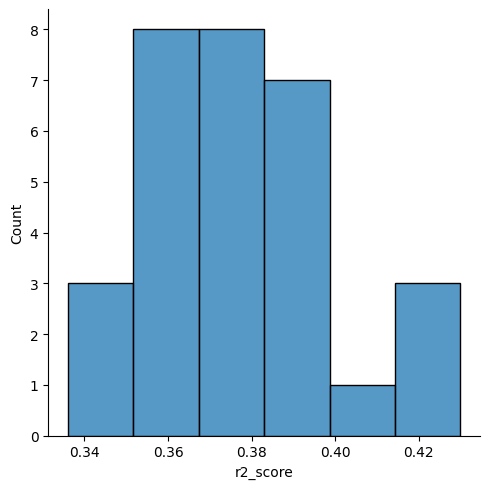

In [39]:
sns.displot(score.r2_score)